# GAN training and image generation

### Importing libraries

In [ ]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt


import torchvision
from torchvision import datasets,transforms
from torchvision.transforms.functional import to_pil_image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, ConcatDataset

### Building and training model

In [ ]:
from GAN_model import DCGAN, GeneratorModel, DiscriminatorModel
from dataset import CustomDataset
from train import train_
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

generator = GeneratorModel().to(device)
discriminator = DiscriminatorModel().to(device)
dcgan = DCGAN(generator, discriminator, latent_dim=300)

dcgan.compile(
    g_optimizer=optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999)),
    d_optimizer=optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999)),
    loss_fn=nn.BCELoss()
)

dcgan = train_(dcgan, dataloader, epochs = 30)

### Generating random images

In [ ]:
generate(dcgan, num_images = 8, latent_dim = 300)

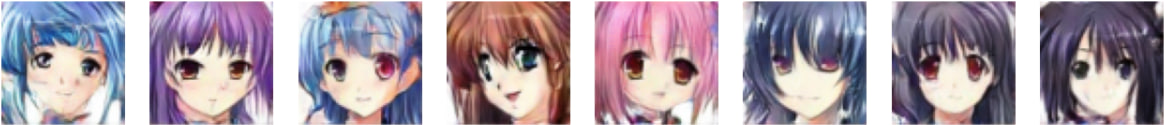